# EDA: Análisis y preprocesado de datos

Se ha realizado un análisis extensivo de los datos proporcionados para filtrar solo aquellos que son requeridos, además de asegurarse de solo aceptar instancias y atributos que no puedan ocasionar problemas. Con este objetivo en mente, se han realizado una serie de pasos para asegurar el comprobar todos los datos:
- Obtención de los datos en bruto correspondientes
- Análisis y conversión de tipos de los datos en bruto
- Visualización de la variable objetivo energía
- Comprobación de número de datos para buscar *missing values* y columnas constantes
- Identificación de variables correladas y atributos irrelevantes

Todos estas secciones se han acompañado de gráficos para la visualización de los distintos resultados. 

In [2]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

SEED = 472182
random.seed(SEED)
np.random.seed(SEED)
pd.set_option('display.max_columns', 500)

## Obtención de la datos en bruto

Para la obtención de los datos en bruto se ha realizado la lectura del fichero csv que contiene los datos que van a ser usados para el entrenamiento del modelo usando la librería pandas. De los datos proporcionados solo interesa utilizar los correspondientes a Sotavento, localización que contiene el identificador 13. Los atributos de esta contienen en su nombre siempre la terminación .13, lo cual se ha usado en una expresión regular para filtrar todos los datos correspondientes a otras localidades. 

Una vez realizado el filtro, se muestra el tamaño del dataset resultante así como un resumen de las características de sus distintas columnas. 


Para la obtención de los datos en bruto vamos a realizar la lectura del csv de los datos de entrenamiento y como dice el enunciado quedarnos con los atributos que se refieren a la zona 13, además de la variable objetivo y de los datos temporales

Tras esto mostraremos un resumen de los datos para analizarlos


In [3]:
data = pd.read_csv("wind_ava.csv")
#Esto quita todas las columnas que no terminan en .13
data = data.filter(regex='.*\.13|energy|datetime')
print("El tamaño del data set es:" ,data.shape)
data.describe(include='all')

El tamaño del data set es: (4748, 24)


,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,4748,4748.000000,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
unique,4748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2005-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,693.126247,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,97820.301287,286.666391,0.303070,0.167105,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204
std,NaN,665.531609,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,713.689654,6.414325,3.158104,3.058615,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552
min,NaN,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,93770.364813,273.498473,-8.483701,-8.845246,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453
25%,NaN,144.170000,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,97459.369264,281.809651,-2.300545,-2.116098,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194
50%,NaN,465.305000,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,97861.147677,286.063980,0.027782,-0.236536,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416
75%,NaN,1089.375000,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,98251.478418,291.173637,2.632151,2.239831,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395


En esta tabla se puede comprobar que se consiguen 4748 instancias de 24 columnas, correspondiendo una a la variable resultado energía. Además, se comprueba que la variable datetime no es de un tipo manejable, y que necesitará de una conversión. Se ha utilizado la función data.dtypes para confirmar su tipo:

In [4]:
data.dtypes

datetime       object
energy        float64
p54.162.13    float64
p55.162.13    float64
cape.13       float64
p59.162.13    float64
lai_lv.13     float64
lai_hv.13     float64
u10n.13       float64
v10n.13       float64
sp.13         float64
stl1.13       float64
u10.13        float64
v10.13        float64
t2m.13        float64
stl2.13       float64
stl3.13       float64
iews.13       float64
inss.13       float64
stl4.13       float64
fsr.13        float64
flsr.13       float64
u100.13       float64
v100.13       float64
dtype: object

Observamos que datetime por defecto es un objeto, lo cual probablemente es provocado al haberse interpretado la fecha como un *string*. Para poder utilizar este atributo se realiza un casting a un tipo datetime, añadiendo en este paso además distintas columnas que separan año, mes, día y hora. Estas nuevas columnas servirán para poder realizar un análisis de los datos más exhaustivo en épocas específicas, ya que al ser el resto de columnas valores de condiciones climáticas, se considera importante la separación en grupos como el mes al que pertenecen. Estas columnas serán eliminadas antes de realizar el entrenamiento del modelo.

In [5]:
data["datetime"] = pd.to_datetime(data["datetime"])
data["year"] = data["datetime"].dt.year
data["month"] = data["datetime"].dt.month
data["day"] = data["datetime"].dt.day
data["hour"] = data["datetime"].dt.hour
print("El tamaño del data set es:" ,data.shape)

El tamaño del data set es: (4748, 28)


## Análisis de los datos en bruto
Después de todos los pasos tomados en la anterior sección, el tamaño final con el que se comienza el análisis de los datos es de 4748 instancias de 27 atributos más la variable resultado. 

Después de la conversión de la columna datetime, ahora se puede realizar una descripción completa de toda la tabla en la que comprobar valores como la media o la desviación típica de cada una de las columnas:


In [6]:
data.describe(include= "all")

,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13,year,month,day,hour
count,4748,4748.000000,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,2007-02-20 00:43:40.387531520,693.126247,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,97820.301287,286.666391,0.303070,0.167105,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204,2006.628475,6.628054,15.652485,9.123842
min,2005-01-02 18:00:00,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,93770.364813,273.498473,-8.483701,-8.845246,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453,2005.000000,1.000000,1.000000,0.000000
25%,2005-12-11 04:30:00,144.170000,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,97459.369264,281.809651,-2.300545,-2.116098,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194,2005.000000,4.000000,8.000000,6.000000
50%,2006-11-18 15:00:00,465.305000,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,97861.147677,286.063980,0.027782,-0.236536,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416,2006.000000,7.000000,16.000000,12.000000
75%,2007-12-03 07:30:00,1089.375000,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,98251.478418,291.173637,2.632151,2.239831,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395,2007.000000,10.000000,23.000000,18.000000
max,2009-12-31 18:00:00,2792.550000,2.580387e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.974802,11.699814,99917.733093,305.043177,12.941947,11.698349,305.000640,299.556292,295.639998,2.842552,2.366522,292.808658,0.428914,-5.618172,18.964137,16.913033,2009.000000,12.000000,31.000000,18.000000
std,NaN,665.531609,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,713.689654,6.414325,3.158104,3.058615,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552,1.414856,3.475914,8.844734,6.755085


De esta tabla se pueden sacar varias conclusiones:
- Cada uno de los atributos tienen rangos completamente dispares, habiendo valores en el rango de los millones en columnas como p59.162.13, mientras que en columanas como lai_lv.13 el mayor valor no llega a 4. Esta gran diferencia será corregida en el entrenamiento del modelo mediante una normalización que asegure un peso equitativo de todos los atributos en el entrenamiento.

- Las desviaciones típicas observadas será necesario adaptarlas a la escala de los datos con el uso de la media, ya que en los valores proporcionados no es posible sacar conclusiones al depender estas de los rangos de valores de cada atributo. 

- Gracias al mínimo y máximo de la columna datetime se puede confirmar que existen datos desde el 1 de febrero de 2005 hasta el 31 de diciembre de 2009. 

- Según los datos de la fila hora, existen mediciones cada 6 horas, existiendo instancias a las 6 y 12 de la mañana y noche.

- Existen columnas con datos muy similares como v10n, u10n, v110 y u10, las cuales deberán ser extensamente analizadas en la fase de correlación para poder evitar posibles problemas que puedan causar estas si están altamente correladas. En esta fase posterior se decidirá si es necesario eliminar alguna de ellas o utilizar otros métodos como la distancia Mahalanois para el trato de estas. 

- Todos los atributos continen 4748 valores, pero será necesario comprobar más adelante si pueden faltar valores representadoes de alguna manera distinta al vacío. Además, hay que tener en cuenta que aunque existan 5 años de datos, si existiesen datos para todos los intervalos de 6 horas serían necesarios más de 5000 instancias. Este problema se analizará profundamente en una sección posterior. 

Una vez realizado este análisis, se comienza adaptando la desviación para poder conseguir una conclusión más adecuada de los datos:

## Visualización de la distribución de la variable objetivo
Para la correcta evaluación de la variable objetivo vamos a representar a través de un histograma y de diagrama de caja. 
- El histograma nos permite observar el número de veces que aparece un valor de la variable objetivo
- El diagrama de caja nos permite observar la existencia de valores atípicos


Text(0.5, 1.0, 'Distribución de la variable objetivo')

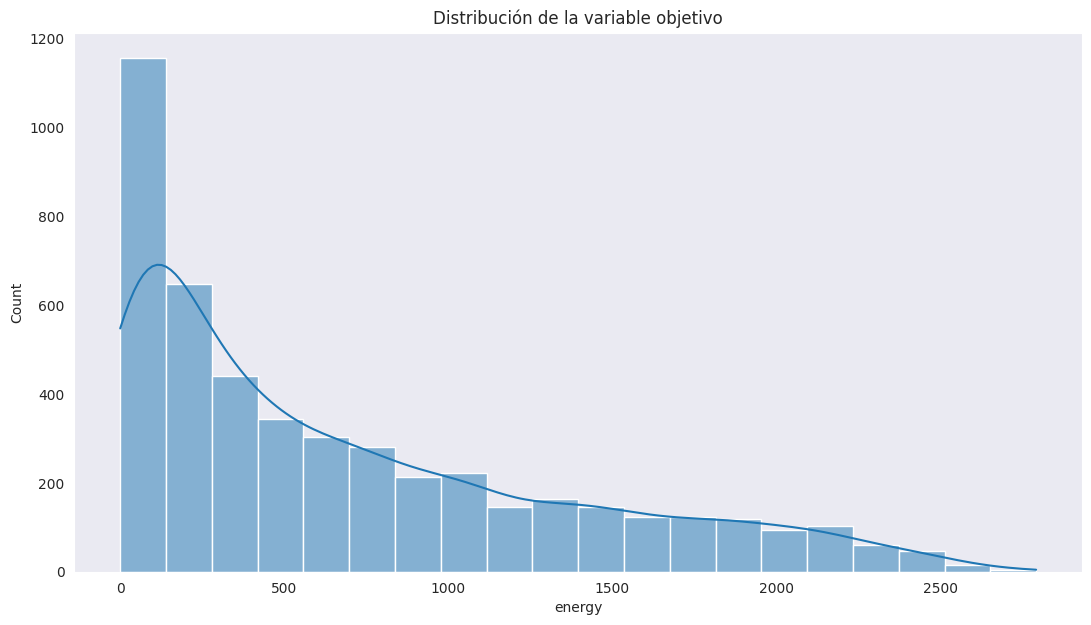

In [7]:
sns.set_style("dark")
plt.figure(figsize=(13,7))
sns.histplot(data.energy,kde = True, bins = 20)
plt.title("Distribución de la variable objetivo")


Text(0.5, 1.0, 'Diagrama de caja que muestra los valores atípicos')

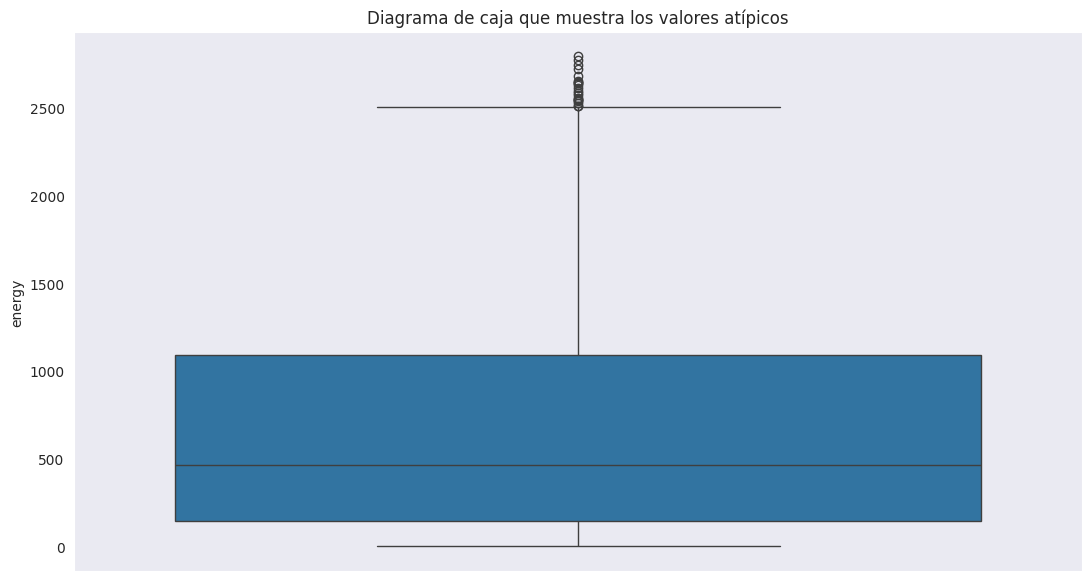

In [8]:
sns.set_style("dark")
plt.figure(figsize= (13,7))
sns.boxplot(data.energy)
plt.title("Diagrama de caja que muestra los valores atípicos")

Gracias al muestreo de los datos somos capaces de identificar que nuestros datos siguen una distribución benford y que tenemos diversos outliers.

A continuación trataremos de identificar la cantidad exacta de valores atípicos.

In [9]:
# Código para identificar valores atípicos

## Identificación/Búsqueda de valores faltantes y duplicados

Para seguir analizando los datos haremos incapie en los valores, más en concreto en la identificación de los valores faltantes y duplicados.

A continuación realizaremos una búsqueda de los valores faltantes

In [10]:
print(data.isnull().sum().any())
print(data.duplicated().any())

False
False


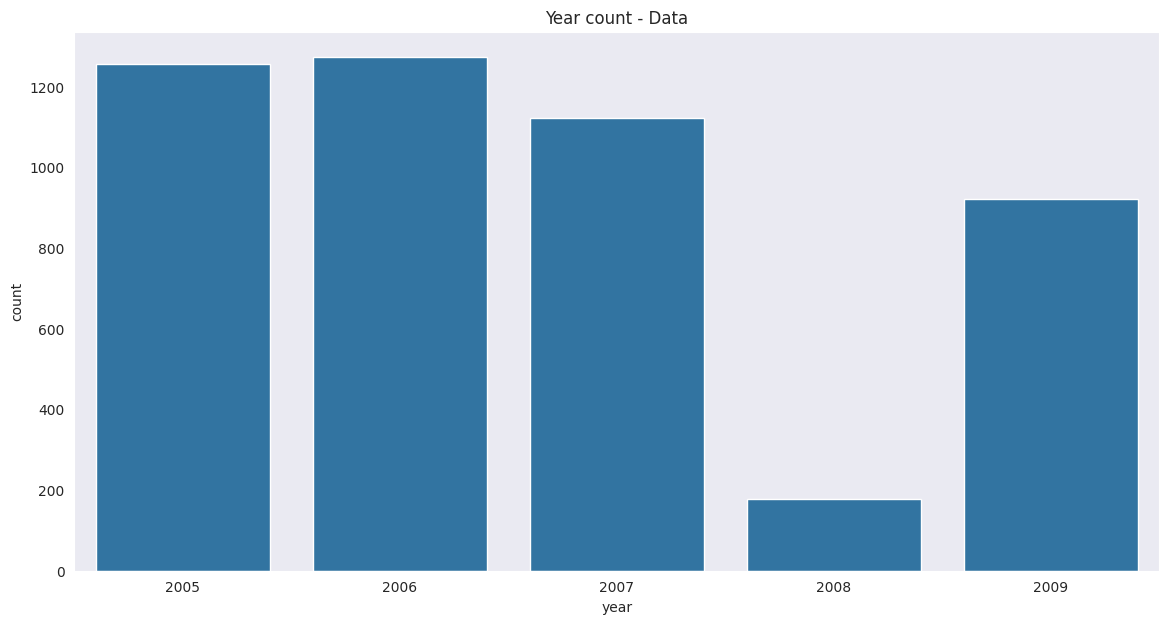

In [11]:
plt.figure(figsize= (14,7))
sns.countplot(x = "year", data = data)
plt.title("Year count - Data")
plt.show()

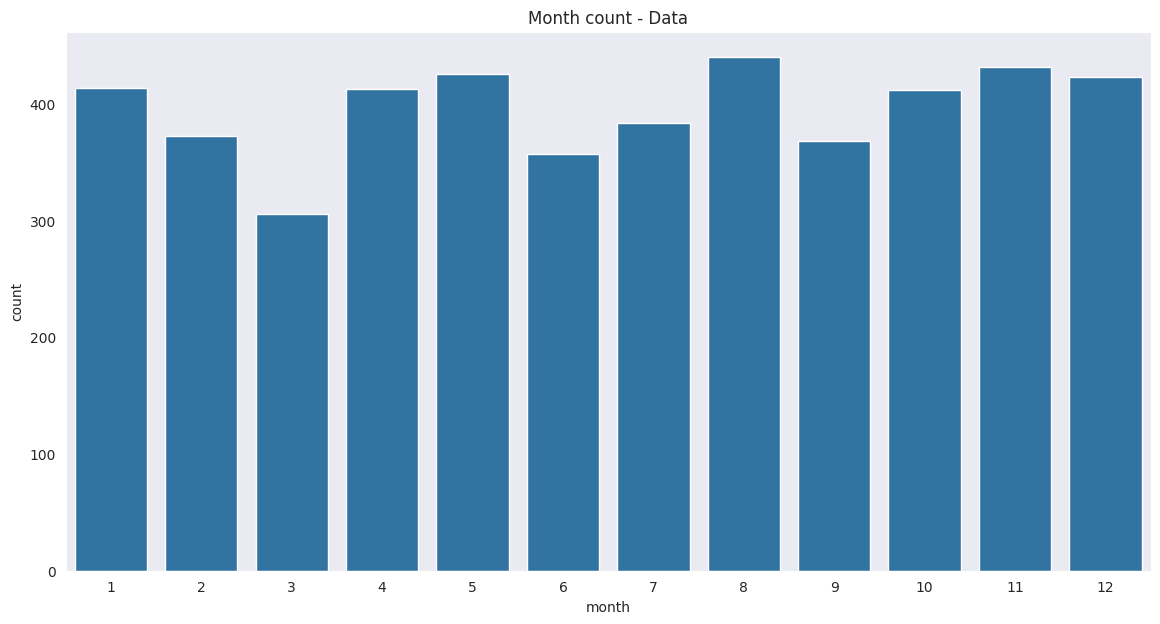

In [12]:
plt.figure(figsize= (14,7))
sns.countplot(x = "month", data = data)
plt.title("Month count - Data")
plt.show()

## Evalución de las Correlaciones de las propiedades

Con el objetivo de filtrar atributos que estén fuertemente ligados vamos a realizar un estudio de las correlaciones. Si las correlaciones superan 0.95 borraremos esas propiedades, ya que entendemos que los valores son muy similares.

Index(['datetime', 'energy', 'p54.162.13', 'p55.162.13', 'cape.13',
       'p59.162.13', 'lai_lv.13', 'lai_hv.13', 'u10n.13', 'v10n.13', 'sp.13',
       'stl1.13', 'u10.13', 'v10.13', 't2m.13', 'stl2.13', 'stl3.13',
       'iews.13', 'inss.13', 'stl4.13', 'fsr.13', 'flsr.13', 'u100.13',
       'v100.13', 'year', 'month', 'day', 'hour'],
      dtype='object')
0.9802767532748907
0.9986147399001334
0.9986147399001334
0.9943128113164796
0.9780240443597741
0.995934812980231
0.9558746848828626
0.9835106133444562
0.9707703572093923
0.9943128113164796
0.9898201481175758
0.995934812980231
0.9919376894436299
0.9707703572093923
0.9558746848828626
0.9780240443597741
0.9898201481175758
0.9835106133444562
0.9919376894436299
0.9802767532748907
{'lai_hv.13', 'v10n.13', 'v100.13', 'stl1.13', 'v10.13', 't2m.13', 'inss.13', 'lai_lv.13', 'u100.13', 'year', 'u10.13', 'u10n.13', 'datetime'}


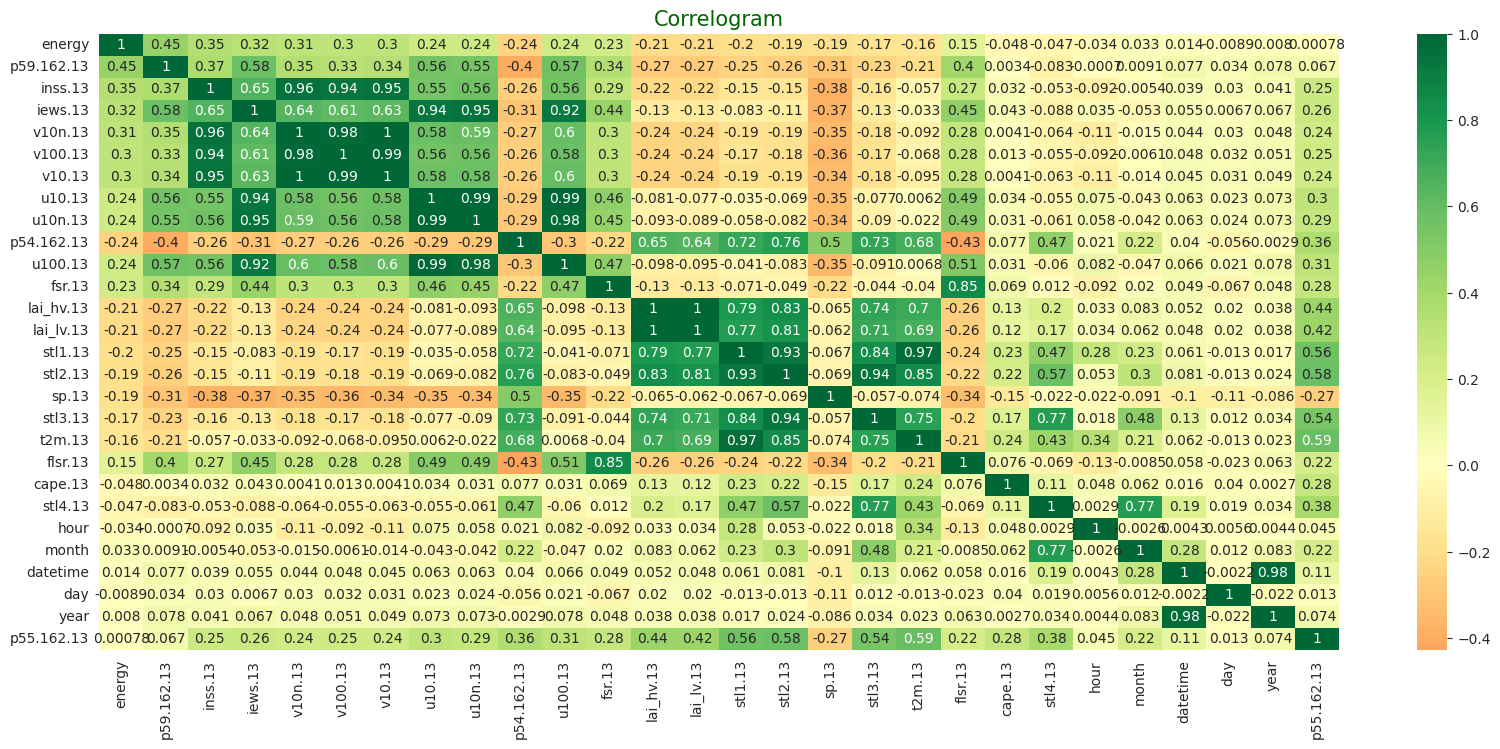

In [14]:
correlations = data.corr()
tamaño = data.shape
corr_lineales = set()
corrs = abs(correlations['energy']).sort_values(ascending = False)
print(correlations.columns)
for col in correlations.columns:
    for elem in correlations[col]:
        if elem > 0.95 and elem != correlations[col][col]:
            corr_lineales.add(col)
            print(elem)
print(corr_lineales)
corr = data[list(corrs.index)].corr()
plt.figure(figsize = (20, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

/home/paula/Documents/aprendizaje/p1/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


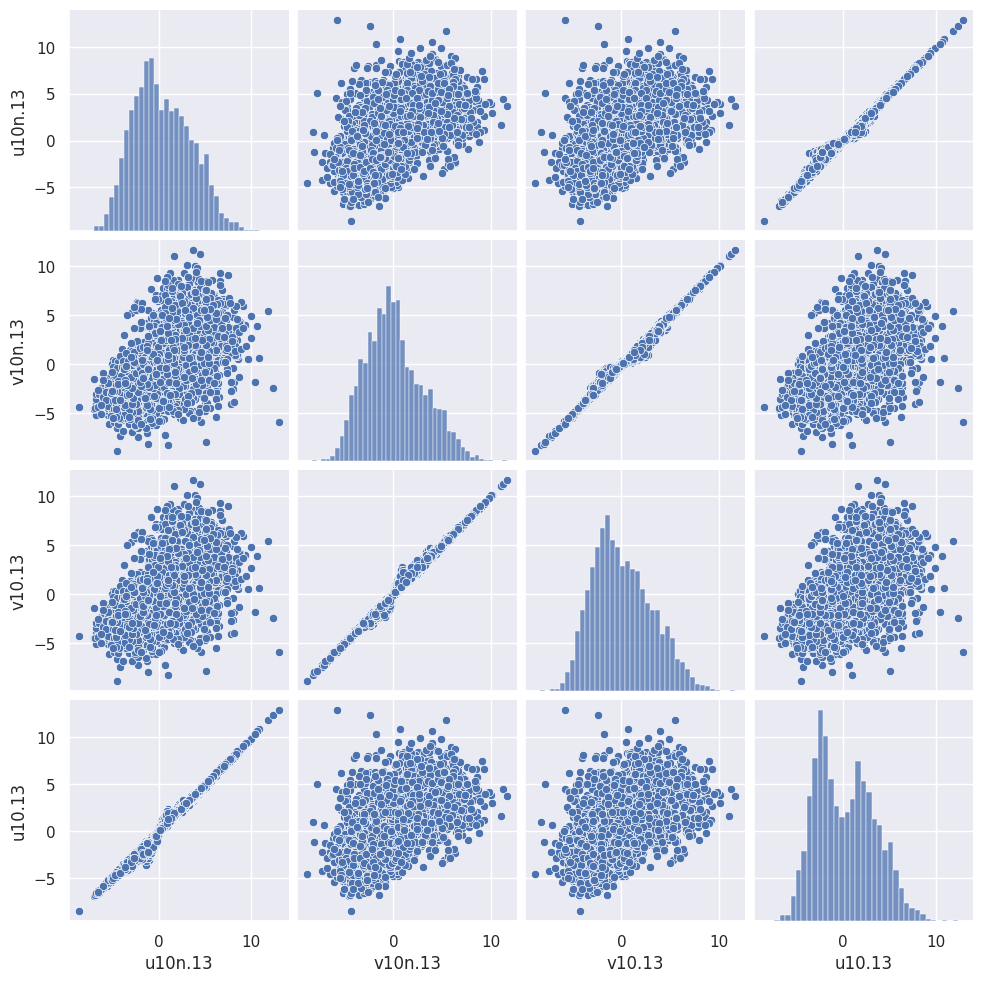

In [17]:
sns.set_theme()
cols = ['u10n.13', 'v10n.13', 'v10.13', 'u10.13']
sns.pairplot(data[cols], size = 2.5)
plt.show()


cosas a tener en cuenta para eliminar o no corrreladas: correlación y usar columnas inútiles lleva a un sobredimensionalización y problemas de overfitting, al tener muchos datos pero ser toda una columna básicamente inútil. Díria de quitas las que sean > 0.98, porque además si usamos distancia euclidiana puede que esaas columnas contaminen los datos
u10n y u10 y el resto columnas con nombres parecidos tienen una correlación de al menos 0.99. Conceptualmente son el mismo componente del viento pero uno es viento neutral y el otro no, no se que significa eso


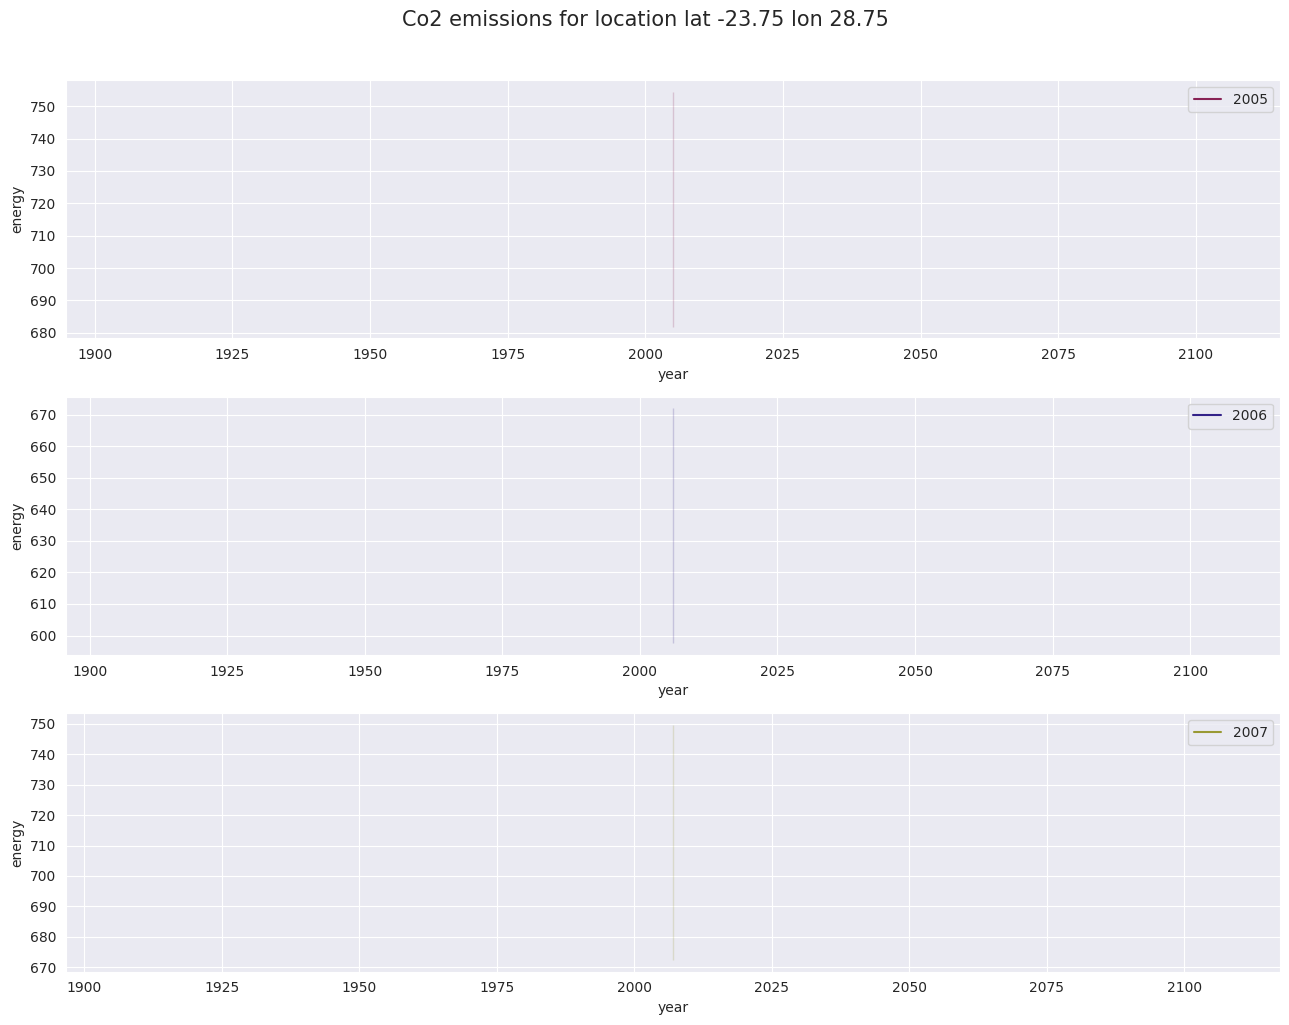

In [ ]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (13, 10))
fig.suptitle('Co2 emissions for location lat -23.75 lon 28.75', y=1.02, fontsize = 15)

for ax, data_, year, color, in zip(axes.flatten(), data, data.year.unique(), ['#882255','#332288', '#999933' , 'orangered']):
  df = data[data.year == year]
  sns.lineplot(x=df.year,y= df.energy, ax = ax, label = year, color = color)
plt.legend()
plt.tight_layout()